<a href="https://colab.research.google.com/github/aadarshsenapati/machine-learning/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
df = pd.read_csv("/content/multiclass.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 35.1MB/s]


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [24]:
print("Columns:", df.columns)

Columns: Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen', 'class'],
      dtype='object')


Class distribution before balancing:
class
2    180
3    173
1     87
Name: count, dtype: int64


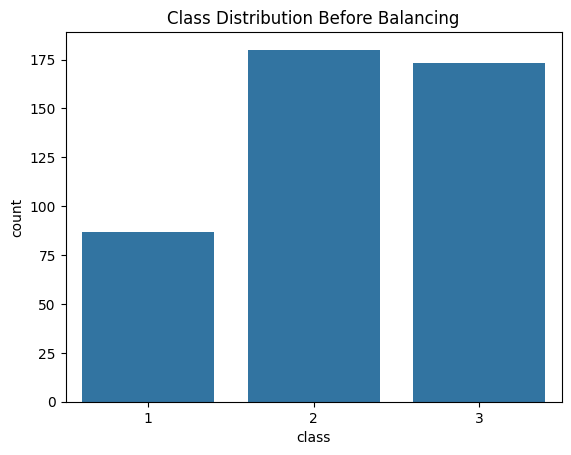

In [25]:
X = df.select_dtypes(include=[np.number]).drop("class", axis=1)
y = df["class"]
print("Class distribution before balancing:")
print(y.value_counts())
sns.countplot(x=y)
plt.title("Class Distribution Before Balancing")
plt.show()

Class distribution after SMOTE:
Counter({2: 180, 1: 180, 3: 180})


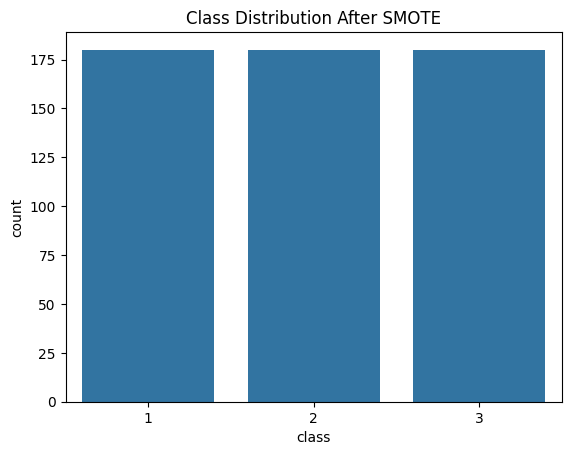

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print("Class distribution after SMOTE:")
print(Counter(y_res))
sns.countplot(x=y_res)
plt.title("Class Distribution After SMOTE")
plt.show()

In [28]:
print(df.dtypes)

Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
class               int64
dtype: object


In [29]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)
X = df[numeric_cols].drop("class", axis=1)
y = df["class"]

Numeric columns: ['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'class']


In [30]:
X = df[numeric_cols].drop("class", axis=1)
X = np.log1p(X)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values
y_test = y_test.values

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
class KNN_Scratch:
    def __init__(self, k=5):
        self.k = k
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

In [41]:
knn_scratch = KNN_Scratch(k=7)
knn_scratch.fit(X_train, y_train)
y_pred_scratch = knn_scratch.predict(X_test)
print("Scratch KNN Accuracy:", np.mean(y_pred_scratch == y_test))

Scratch KNN Accuracy: 0.9074074074074074


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = range(1, 31)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

In [43]:
best_k = k_values[np.argmax(accuracies)]
print("Best K:", best_k, "with Accuracy:", max(accuracies))

Best K: 5 with Accuracy: 0.9259259259259259


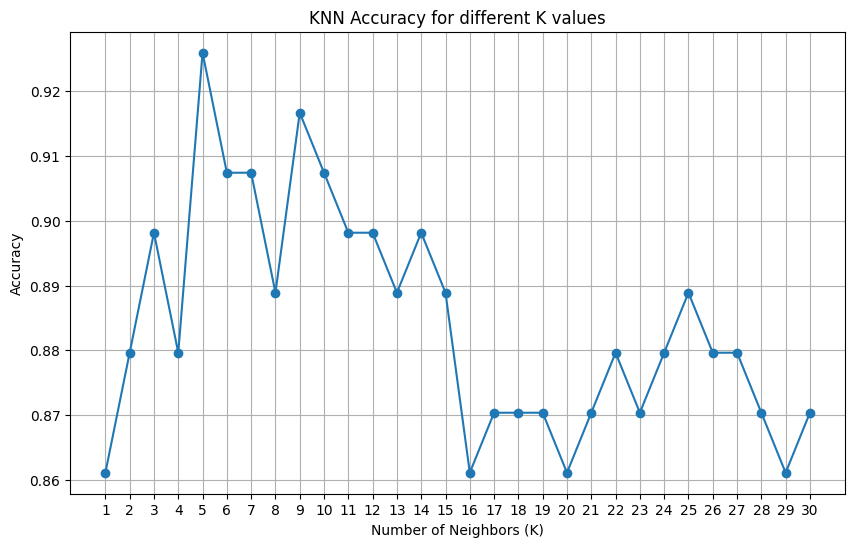

In [44]:
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for different K values")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [45]:
final_knn = KNeighborsClassifier(n_neighbors=best_k, weights="distance")
final_knn.fit(X_train, y_train)
print("Final Train Accuracy:", final_knn.score(X_train, y_train))
print("Final Test Accuracy :", final_knn.score(X_test, y_test))

Final Train Accuracy: 1.0
Final Test Accuracy : 0.9259259259259259


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn_sklearn = KNeighborsClassifier(n_neighbors=5)
knn_sklearn.fit(X_train, y_train)
print("Sklearn KNN - Train Accuracy:", knn_sklearn.score(X_train, y_train))
print("Sklearn KNN - Test Accuracy :", knn_sklearn.score(X_test, y_test))

Sklearn KNN - Train Accuracy: 0.9097222222222222
Sklearn KNN - Test Accuracy : 0.9259259259259259
